<a href="https://www.kaggle.com/code/elnazabbasifar/mobile-price-prediction-using-dt-and-rf?scriptVersionId=152764464" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Mobile Price Prediction

In this project, we predict the price range of mobile devices based on specifications such as battery power, 3G capability, WiFi, Bluetooth, RAM, and more.

# Decision Tree:
Decision Tree is a supervised machine learning algorithm that uses a tree-like model of decisions and their possible consequences. It works by recursively splitting the data into subsets based on the values of the features, with the goal of minimizing a criterion, such as Gini impurity or entropy.

## Advantages of Decision Tree:
**Easy to interpret and explain** - Decision Trees are easy to interpret and explain, even for complex models.

**Handles both numerical and categorical data** - Decision trees can handle both numerical and categorical data.

**Nonlinear relationships between parameters do not affect tree performance** - Decision trees can handle nonlinear relationships between parameters without affecting performance.

## Disadvantages of Decision Tree:
**Prone to overfitting** - Decision trees are prone to overfitting, especially when trained with noisy or incomplete data sets.

**Unstable** - Small variations in the data can result in a completely different decision tree being generated

**Poor approximation of complex functions** - Decision Trees may not be suitable for approximating complex functions, as they are limited by the axis-parallel splits at each node.

### Note:
Decision Trees do not require standard scaling of the data before model building. Standard scaling is typically used for algorithms that are sensitive to the scale of the input features, such as distance-based algorithms like KNN and SVM.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.base import clone

### Load Dataset

In [3]:
df = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Data Review

In [4]:
df.shape

(2000, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [7]:
df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

###checking null values
df.isnull().sum()

<Axes: xlabel='price_range', ylabel='count'>

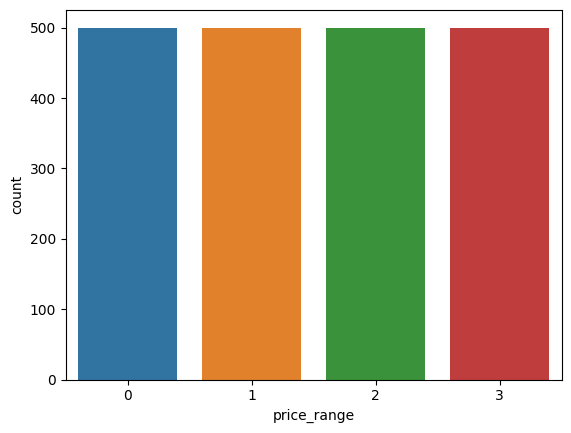

In [8]:
# visualizing the price_range column.
sns.countplot(x='price_range', data=df)

# Feature Selection
### Definition:

**Feature selection** is the process of **selecting a subset of relevant features** from a larger set of features in a dataset to improve the performance of a machine learning model. The selected features are used to build a model that can accurately predict the target variable, while **ignoring irrelevant or redundant features** that can negatively impact model performance.

### Advantages:
It can improve model accuracy by **reducing overfitting**, which occurs when a model is too complex and captures noise in the data instead of the underlying patterns.

It can **reduce the time and computational resources** required to train a model by removing unnecessary features, leading to faster model development and deployment.

It can **improve the interpretability of the model** by identifying the most important features that are driving the predictions, making it easier for humans to understand the model and its decision-making process.

### Techniques:
**Filter methods:** These methods use statistical measures to rank the features based on their correlation with the target variable, and select the top-ranked features.

Examples - Pearson correlation coefficient, chi-squared test

**Wrapper methods:** These methods evaluate the performance of a machine learning model on different subsets of features, and select the subset that produces the best performance.

Examples - Drop-column feature selection.

**Embedded methods:** These methods incorporate feature selection as part of the model training process, and select the most important features based on their contribution to the model performance.

Examples - LASSO regression, Ridge regression, Decision trees

**Dimensionality reduction:** These methods reduce the number of features by transforming the original feature space into a lower-dimensional space, while retaining as much of the variance in the data as possible.

Example - PCA

### Strategy:
We will perform **Drop-column Feature Importance** as a Wrapper method.

We will implement models such as **Decision Tree** and **Random Forest** as Embedded methods.

# Drop-column Feature Importance
**Drop-column Feature Importance** is a machine learning technique used to evaluate the importance of features in a dataset. It involves measuring the impact of removing a feature on the performance of a pre-trained model. The feature whose removal causes the largest decrease in the model's performance is considered the most important feature. Drop-column feature importance can be used in conjunction with algorithms that provide a built-in measure of feature importance. It is computationally efficient and can provide a more precise measure of feature importance.

Drop-column Feature Importance method does not reflect to the intrinsic predictive value of a feature by itself but how important this feature is **for a particular model.**

In this project, the target contains 4 classes and it is **completely balanced**. Also, none of the classes is of particular importance compared to the other. Therefore, in this project, **accuracy** can be a good metric to measure the performance of the models.

If we want to evaluate the performance of our models using precision, recall, and f1-score, since our dataset is multi-class and each class is equally important and needs to be evaluated separately, we use **macro-level metrics**.

Next, we will implement Drop-column Feature Importance Technique through a function using cloning:

In [9]:
def drop_column_importance(model, X_train, y_train, random_state=0):
    """
    Estimate the feature importance of a given machine learning model using the Drop-column Feature Importance technique.

    Parameters
    ----------
    model : object
        A scikit-learn compatible estimator object.
    X_train : pandas.DataFrame
        The training dataset containing the feature variables.
    y_train : pandas.Series
        The training dataset containing the target variable.
    random_state : int, optional (default=0)
        The random seed used to initialize the model's random state.

    Returns
    -------
    pandas.DataFrame
        A DataFrame with two columns, 'feature' and 'feature importance', where the latter represents the decrease in model 
        performance when a feature is removed. The DataFrame is sorted in descending order by 'feature importance'.
    """
    
    # list containing feature importances
    importances = []
    # Clone the model
    model_clone = clone(model)
    # Set random_state for comparability
    model_clone.random_state = random_state
    # Train the model
    model_clone.fit(X_train, y_train)
    # Create the cross-validation object using StratifiedKFold 
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    # Score the benchmark model using cross-validation
    benchmark_score = cross_val_score(model_clone, X_train, y_train, cv=cv, scoring='accuracy').mean()

    
    # Iterate over all features and store feature importance
    for col in X_train.columns:
        # Clone the model
        model_clone = clone(model)
        # Set random_state for comparability
        model_clone.random_state = random_state
        # Traint the model on the the dataset with a single feature removed
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        # Score the droped-column model
        drop_column_score = cross_val_score(model_clone, X_train.drop(col,axis=1), y_train, cv=cv, scoring='accuracy').mean()
        # Store feature importance which is defined as the difference between the benchmark and the new model score
        importances.append(benchmark_score - drop_column_score)
        
    # Return the features along with their importances in the form of a dataframe
    importances_df = pd.DataFrame({'feature': X_train.columns, 'feature importance': importances}) \
                     .sort_values('feature importance', ascending = False).reset_index(drop = True)
           
    return importances_df    

Then, We define a function to **visualize** the results of **Drop-column Feature Importance technique** using bar charts:

In [10]:
def drop_column_importance_plot(model, X_train, y_train):
    """
    Visualize the feature importance of a given machine learning model using the Drop-column Feature Importance technique.

    Parameters
    ----------
    model : object
        A scikit-learn compatible estimator object.
    X_train : pandas.DataFrame
        The training dataset containing the feature variables.
    y_train : pandas.Series
        The training dataset containing the target variable.

    Returns
    -------
    None
        Displays a horizontal bar plot showing the feature importances based on the drop-column technique.
    """
    
    # Call drop-column feature importance function
    df_drop_column = drop_column_importance(model, X_train, y_train, random_state=0)
    # Rename columns
    df_drop_column.columns = ['Feature', 'Feature Importance']
    
    # Plot barchart
    plt.figure(figsize=(8,6))
    sns.barplot(data=df_drop_column, x='Feature Importance', y='Feature', orient='h', color='orangered')
    plt.title('Drop Column Feature Importance', fontsize=20)
    plt.show()

In the next steps, we will use these functions before building our final model regarding each classification algorithm to detect redundant features.

## Prepare and Split the Data

In [11]:
x = df.drop('price_range', axis=1)
y = df['price_range']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= 0)

In [13]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1500, 20)
X_test shape:  (500, 20)
y_train shape:  (1500,)
y_test shape:  (500,)


# Decision Tree Hyperparameter Tuning:
Hyperparameter tuning is crucial for decision trees because they are prone to overfitting. Overfitting occurs when the tree is too complex and fits the training data too closely, capturing even the noise in the data. Tuning the hyperparameters can help to avoid overfitting and improve the performance of the model on new, unseen data.

### **Ways to Prevent Overfitting in Decision Trees:**
**Pruning** - Removing branches of the tree that do not contribute much to the classification.

**Using ensemble methods** - Combining multiple decision trees to obtain a more robust model.

**Tune Hyperparameters** - Hyperparameter tuning can help prevent decision tree classifiers from overfitting by controlling the complexity of the tree.
### **Most Common Hyperparameters in Decision Trees:**
**Criterion:** This hyperparameter determines the criterion used to measure the quality of a split. Commonly used criteria are Gini Impurity and Information Gain.

**Maximum depth:** This hyperparameter controls the maximum depth of the tree. The deeper the tree, the more complex it becomes, which can lead to overfitting. Setting a maximum depth can prevent overfitting by limiting the size of the tree.

**Minimum samples per split:** This hyperparameter sets the minimum number of samples required to split an internal node. If the number of samples at a node is less than this value, the node cannot be split further. This can also prevent overfitting by limiting the size of the tree.

**Minimum samples per leaf:** This hyperparameter sets the minimum number of samples required for a leaf node. If a leaf node has fewer samples than this value, it can be removed.

**Maximum features:** This hyperparameter determines the maximum number of features to consider when splitting a node. It is used to prevent overfitting by reducing the complexity of the model.

We define our hyperparameters grid using the above hyperparameteres and then call tune_hyperparameters function to find the best combination:

In [14]:
def tune_hyperparameters(clf, param_grid, X_train, y_train):
    """
    Tunes the hyperparameters of a classifier using GridSearchCV and cross-validation.

    Parameters:
    ----------
    clf (estimator): A classifier object that implements the estimator interface.
    param_grid (dict): A dictionary of hyperparameter values to search over using GridSearchCV.
    X_train (array-like): The training input samples.
    y_train (array-like): The target values for the training input samples.

    Returns:
    --------
    estimator: The best classifier with the optimal hyperparameters.

    The function uses GridSearchCV to search over a specified hyperparameter grid and
    cross-validation using StratifiedKFold to evaluate the performance of different hyperparameter
    combinations. The function returns the best classifier model with the optimal hyperparameters.
    """
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    print("Best hyperparameters:\n", clf_grid.best_params_)
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_

In [15]:
# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

Let's call tune_hyperparameters function for hyperparameter tuning:


In [16]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Create a  Decision Tree Classifier object
clf = DecisionTreeClassifier(random_state=0)
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=10, cv=5, random_state=0, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best classifier
clf_optimized = random_search.best_estimator_

# Find the best classifier with the optimal hyperparameters
#clf_optimized = tune_hyperparameters(clf, param_grid, X_train, y_train)

# Decision Tree Feature Subset Selection
We realized that there are a number of features that do not have a large effect in the target estimation. By removing irrelevant features from the dataset using feature selection techniques, we can simplify our decision tree and reduce its complexity, which can lead to improve the accuracy of the model by reducing model overfitting. Therefore, in the following, we will use the **drop_column_importance_plot** function to implement the **Drop-column Feature Importance technique** to detect redundant features:

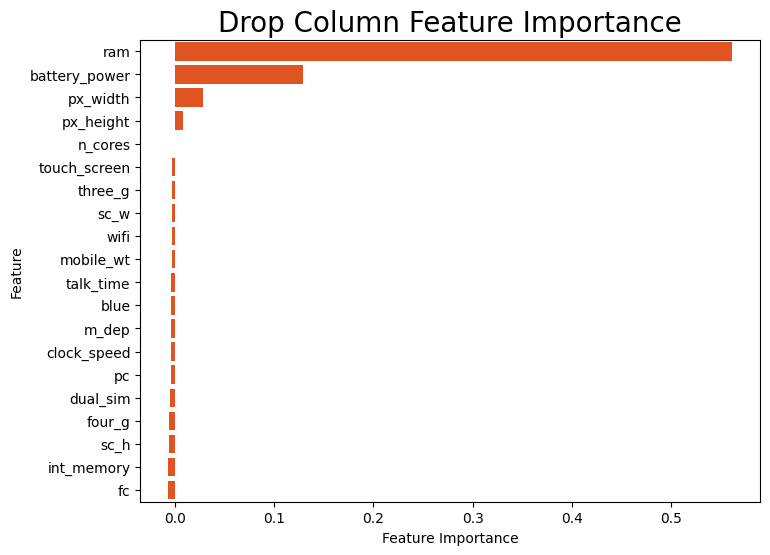

In [17]:
drop_column_importance_plot(clf_optimized, X_train, y_train)

In the Drop-Column feature importance output results, several features with negative importance are observed. Removing these features improves the performance of the model. Let's filter our the dataset:


In [18]:
# Find Important features with positive feature_importance value
feature_importances = drop_column_importance(clf_optimized, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature']  # Threshold value of 0.01

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

We can see the **remaining features** in the dataset (relavant features):

In [19]:
pd.DataFrame(selected_features)

,feature
0,ram
1,battery_power
2,px_width


Let's tune the hyperparameters of our model again after removing the irrelevant features:

In [20]:
# Create a  Decision Tree Classifier object
clf = DecisionTreeClassifier(random_state=0)

# Find the best classifier with the optimal hyperparameters
clf_optimized = tune_hyperparameters(clf, param_grid, X_train, y_train)

Best hyperparameters:
 {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}


## Decision Tree Model Evaluation
Let's evaluate our Decision Tree performance 

In [21]:
y_train_dt = clf_optimized.predict(X_train)
y_test_dt = clf_optimized.predict(X_test)

# evaluate the accuracy
print('Training Set Accuracy:', metrics.accuracy_score(y_train,y_train_dt))
print('Testing Set Accuracy:', metrics.accuracy_score(y_test,y_test_dt))

Training Set Accuracy: 0.95125
Testing Set Accuracy: 0.8475


If we compare the accuracy obtained on both training and test sets, we see a decrease of 9% on the accuracy of test set compared to training set, which shows that the model is fairly overfit. Overfitting of the model is due to its high variance, and in the following, we try to prevent the model from overfitting by applying a small change in the value of hyperparameters, hoping that the performance of the model will improve on the test data.

# How each Decision Tree Classifier Hyperparameter Can Reduce Model Variance?
**Maximum depth (max_depth)** - This hyperparameter controls the maximum depth of the decision tree. By limiting the depth of the tree, we can prevent the model from becoming too complex and overfitting the training data, which can help reduce model variance.

**Minimum samples for a split (min_samples_split)** - This hyperparameter specifies the minimum number of samples required to split an internal node. By increasing this value, we can prevent the model from splitting on small, noisy subsets of the data, which can help reduce model variance.

**Minimum samples for a leaf (min_samples_leaf**) - This hyperparameter specifies the minimum number of samples required to be at a leaf node. By increasing this value, we can prevent the model from creating small, isolated leaves that capture noise in the training data, which can help reduce model variance.

In [22]:
# Build decision tree classifier considering the obtained optimal values for hyperparameters
dt_final = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=None,  
                                  min_samples_leaf=4, 
                                  min_samples_split=2,
                                  random_state=0)

# Train the final decision tree classifier
dt_final.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4, random_state=0)

In [23]:
y_train_dt = dt_final.predict(X_train)
y_test_dt = dt_final.predict(X_test)

# evaluate the accuracy
print('Training Set Accuracy:', metrics.accuracy_score(y_train,y_train_dt))
print('Testing Set Accuracy:', metrics.accuracy_score(y_test,y_test_dt))

Training Set Accuracy: 0.95125
Testing Set Accuracy: 0.8475


As can be seen, by using **only 6 features** (ram, battery_power, px_width, px_height, blue, and four_g) from the dataset in modeling, we achieved almost **84% accuracy** on test data but our decision tree classifier is still somewhat overfit. It can be **due to the noisy nature of the dataset and the tendency of the decision tree model to overfit on noisy data!** Decision trees can be more robust to noise, especially when using ensemble methods like random forests.

# Random Forest:
**Random Forest** is an ensemble learning classifier that combines multiple decision trees to improve prediction accuracy. It randomly selects a subset of features and data points for each tree, and then combines their predictions through a voting mechanism.

### Advantages of Random Forest:
It is **less prone to overfitting** compared to decision trees, especially when there are highly correlated features in the data.
It has high accuracy and can handle high-dimensional data with a large number of features.

It can provide estimates of feature importance, which can be useful for feature selection and understanding the data.
### Disadvantages of Random Forest:
It can be computationally expensive and may require more resources than other algorithms.

The interpretability of the model is reduced because it is composed of multiple decision trees.

It may not perform well on small datasets or datasets with imbalanced classes.

# Random Forest Hyperparameter Tuning:
 Optimizing the hyperparameters of a Random Forest can improve the accuracy of the model and prevent overfitting or underfitting on the data. A Random Forest model consists of multiple decision trees, which can be either shallow or deep. Shallow trees have a limited number of branches or levels, while deep trees have many branches or levels and are not fully grown. Deep trees tend to have low bias but high variance, which makes them suitable for bagging methods that aim to reduce variance. When selecting hyperparameters for Random Forest, it is important to consider to have deep trees in choosing the range of values for random forest hyperparameters.

## Ways to Prevent Overfitting in Decision Trees:
**Pruning** - Removing branches of the tree that do not contribute much to the classification.

**Using ensemble methods** - Combining multiple decision trees to obtain a more robust model.

**Tune Hyperparameters** - Hyperparameter tuning can help prevent decision tree classifiers from overfitting by controlling the complexity of the tree.
## Most Common Hyperparameters in Random Forest:
**n_estimators**: The number of trees in the forest.

**criterion**: The function to measure the quality of a split. Common criteria include Gini impurity and information gain.

**max_depth**: The maximum depth of a tree. This can be used to control the complexity of the model and prevent overfitting.

**min_samples_split**: The minimum number of samples required to split an internal node.

**min_samples_leaf**: The minimum number of samples required to be at a leaf node.

**bootstrap**: Whether or not to sample with replacement when building the trees in the forest.

**max_features**: The maximum number of features to consider when splitting a node. This can be set as a number or a float (percentage) or 'sqrt' or 'log2'.

Again we set the range of values for each hyperparameter that we want to consider for our Random Forest classifier, and then use tune_hyperparameters function to find the best combination of hyperparameters that provides the best results:

In [24]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [25]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

# Create a random forest classifier object
rf = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0)
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, cv=5, random_state=0, n_jobs=-1)
random_search.fit(X_train, y_train)

# Get the best classifier
rf_optimized = random_search.best_estimator_

# Find the best classifier with the optimal hyperparameters
#rf_optimised = tune_hyperparameters(rf, param_grid, X_train, y_train)

## Random Forest Feature Subset Selection
Again by removing irrelevant features from the dataset using Drop-column Feature Importance, we can simplify our random forest, which can lead to improve the accuracy of the model by reducing model overfitting.

The results of the feature importance analysis show that some of the features in the dataset contribute negatively towards making accurate predictions for the target variable. Therefore, we remove these features from our dataset:

In [26]:
feature_importances = drop_column_importance(rf_optimized, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature']  # Threshold value of 0.01

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

We can see the **remaining features** in the dataset (relavant features):

In [27]:
pd.DataFrame(selected_features)

,feature
0,ram
1,battery_power
2,px_width


Let's tune the hyperparameters of our model again after removing the irrelevant features:

In [28]:
# Create a random forest classifier object
rf = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0)

# Find the best classifier with the optimal hyperparameters
rf_optimised = tune_hyperparameters(rf, param_grid, X_train, y_train)

Best hyperparameters:
 {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


# Random Forest Model Evaluation
Let's evaluate our Random Forest performance.

In [29]:
y_train_grid = rf_optimised.predict(X_train)
y_test_grid = rf_optimised.predict(X_test)

# evaluate the accuracy
print('Training Set Accuracy:', metrics.accuracy_score(y_train,y_train_grid))
print('Testing Set Accuracy:', metrics.accuracy_score(y_test,y_test_grid))

Training Set Accuracy: 0.946875
Testing Set Accuracy: 0.875


The model shows an almost 7% decrease in accuracy on the test set compared to the training set, indicating overfitting. Overfitting is caused by high variance, and adjusting hyperparameters is attempted to improve the model's performance on test data. Among the optimal values obtained for hyperparameters, we decrease the value of n_estimators from 50 to 48 and increase the value of min_samples_leaf from 2 to 4 in order to partially avoid overfitting:

In [30]:
# Build decision tree classifier considering the obtained optimal values for hyperparameters
rf_final = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0,
                                  max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=48)

# Train the final decision tree classifier
rf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=48, random_state=0)

In [31]:
y_train_rf = rf_final.predict(X_train)
y_test_rf = rf_final.predict(X_test)

# evaluate the accuracy
print('Training Set Accuracy:', metrics.accuracy_score(y_train,y_train_rf))
print('Testing Set Accuracy:', metrics.accuracy_score(y_test,y_test_rf))

Training Set Accuracy: 0.939375
Testing Set Accuracy: 0.8725


As we expected, decision trees can be more robust to outliers and noise when we use ensemble methods such as Random Forests. Therefore, we see an almost **3% increase** in the accuracy of the **Random Forest model** compared to the Decision Tree. Again, in Random Forest modeling, we have used only the 4 more relevant features (ram, battery_power, px_width and px_height).